# Lab Experiment 1: Sampling and quantization of audio signals.

#### Q.1 With the help of Python code, show the generation of a signal of the following types:
1. An Exponential Signal whose amplitude decreases as time increases
2. A Sinusoidal Signal (Sine Wave) of a specific frequency

#### Q.2 Plot the above-mentioned signals.

#### Q.3 Show the sampling points for the above-mentioned signals.

#### Q.4 Perform quantization.

#### Q.5 Plot the quantized signals.

In [21]:
# Importing Required Libraries after setting them in venv
import numpy as np
import matplotlib.pyplot as plt

**Q.1 Generating Signals:**

For an exponential signal whose amplitude decreases as time increases, let's say we have an equation like `x(t) = A * e^(-alpha * t)`, where `A` is the amplitude and `alpha` is a decay constant. For a sinusoidal signal, the equation is `x(t) = A * sin(2 * pi * f * t)`, where `A` is the amplitude and `f` is the frequency.

In [34]:
# Parameters for exponential signal
amplitude = 1.0        # Initial amplitude
decay_factor = 0.5     # Decay factor, controls how fast the signal decreases
signal_duration = 10   # Duration of the signal in seconds
sampling_rate = 1000   # Sampling rate in samples per second

# Time values for the signal
time = np.linspace(0, signal_duration, int(signal_duration * sampling_rate))

# Generate the exponential signal
exponential_signal = amplitude * np.exp(-decay_factor * time)

In [43]:
# Parameters for sinusoidal signal
A_sin = 2.0          # Amplitude of the sinusoidal wave
f = 4                # Frequency in Hz
num_samples = 1000   # Number of samples
# Generate time values for the sinusoidal signal
time_sin = np.linspace(0, 1, num_samples)
# Generate the sinusoidal signal
sinusoidal_signal = A_sin * np.sin(2 * np.pi * f * time_sin)

**Q.2 Plotting the above generated Signals:**

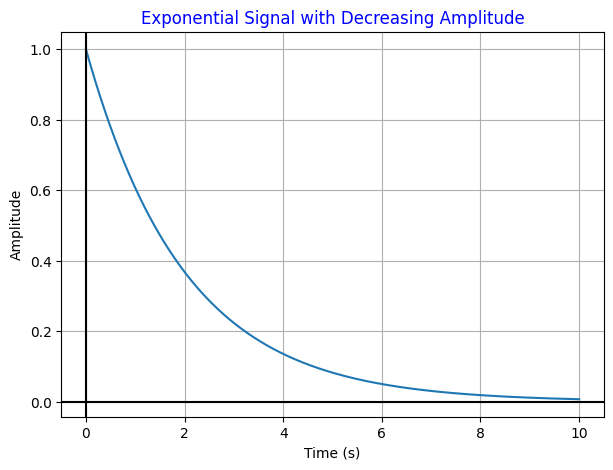

In [37]:
# Plotting time vs amplitude for exponential signal
plt.figure(figsize=(7, 5))
plt.plot(time, exponential_signal, label='Exponential Signal')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# Highlighting axis at x=0 and y=0
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Exponential Signal with Decreasing Amplitude', color='b')
plt.grid(True)
plt.show()

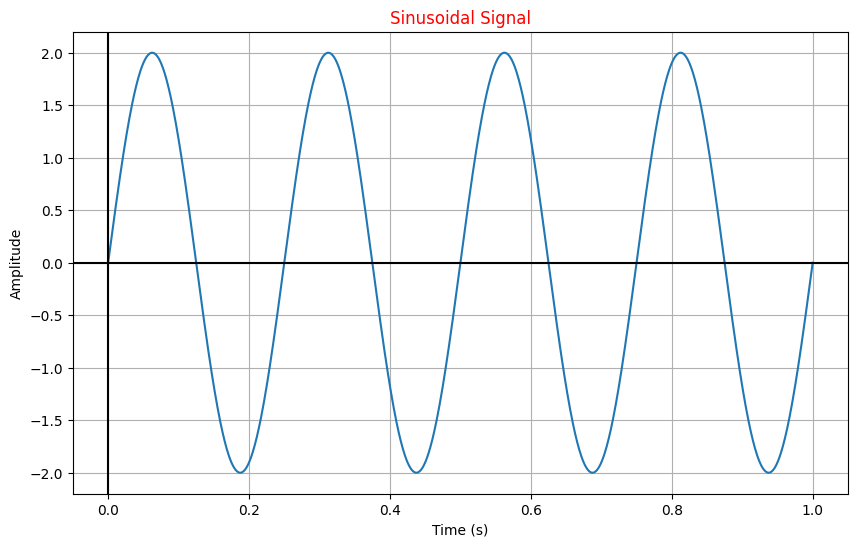

In [45]:
# Plot the sinusoidal signal
plt.figure(figsize=(10, 6))
plt.plot(time_sin, sinusoidal_signal, label='Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Signal')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Sinusoidal Signal', color='r')
plt.grid(True)
plt.show()

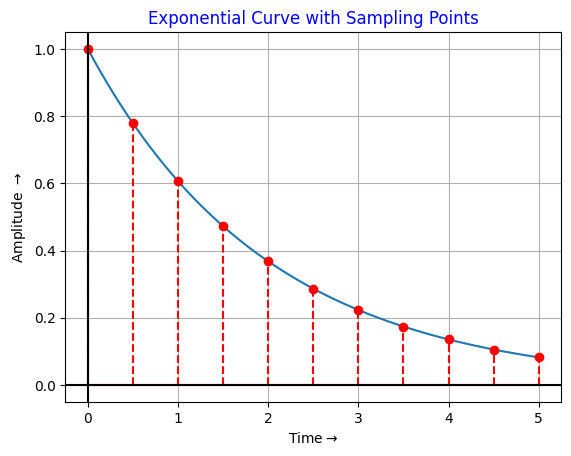

In [3]:
# Generating time data using arange function from numpy
amplitude=1.0
decay_factor=0.5
time = np.arange(0,5, 10)
sampling_interval=0.5
time = np.arange(0,5, 0.0001)

# Finding amplitude at each time
exponential_signal=amplitude*np.exp(-decay_factor*time)
sampling_points=np.arange(0,5+sampling_interval, sampling_interval)
amplitude_decay = constant * np.exp(-time)

# Plotting time vs amplitude using plot function from pyplot
plt.plot(time, exponential_signal)
#plt.plot(time, amplitude_decay)

plt.stem(sampling_points, amplitude*np.exp(-decay_factor*sampling_points),'r',markerfmt='ro',linefmt='r--')
plt.title('Exponential Curve with Sampling Points', color='b')
plt.xlabel('Time'+ r'$\rightarrow$')
plt.ylabel('Amplitude '+ r'$\rightarrow$')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

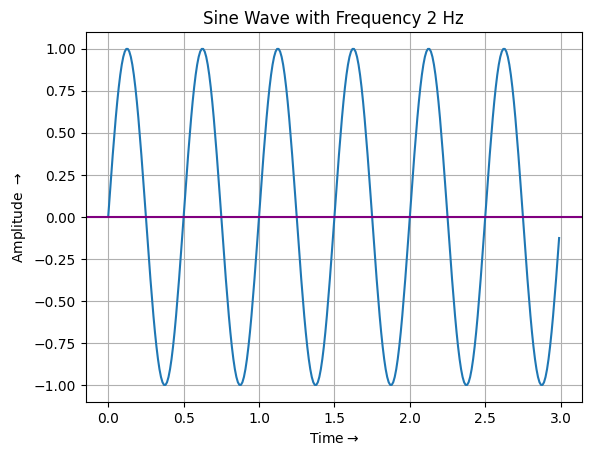

In [4]:
frequency = 2
time = np.arange(0, 3, 0.01)
amplitude = np.sin(2 * np.pi * frequency * time)

plt.plot(time, amplitude)
plt.xlabel('Time'+ r'$\rightarrow$')
plt.ylabel('Amplitude '+ r'$\rightarrow$')
plt.title(f'Sine Wave with Frequency {frequency} Hz')
plt.axhline(y=0, color='purple')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


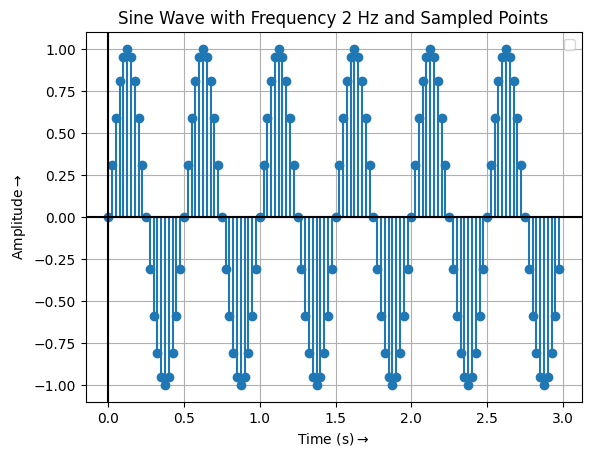

In [5]:
# Frequency of the sine wave
frequency = 2
sampling_rate = 40
duration=3
fs = sampling_rate
# Generating time data using arange function from numpy
time=np.linspace(0,duration,int(sampling_rate*duration),endpoint=False)

# Calculate the amplitude of the sine wave
sine_wave = np.sin(2 * np.pi * frequency * time)

plt.stem(time,sine_wave)
plt.xlabel('Time (s)' + r'$\rightarrow$')
plt.ylabel('Amplitude' + r'$\rightarrow$')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.title(f'Sine Wave with Frequency {frequency} Hz and Sampled Points')
plt.legend()
plt.grid()
plt.show()

In [6]:
# The Audio object allows us to play back sound
# directly in the web browser
from IPython.display import Audio
# We'll use an 8 KHz sampling rate, roughly
# equivalent to telephone quality
#sampling_rate = 8000
#fs = sampling_rate
fs = 8000

# And generate 2 seconds of audio
duration = 2

# Total number of samples
# we round it down to a whole number by int(...)
N = int(duration * fs)

# Generate a pure tone at 220 Hz
f0 = 220

# Make an array of sample indices
n = np.arange(N)  # n is now an array containing values [0, 1, 2, ..., N-1]

# And make the tone, using (n / fs) in place of t
x = np.cos(2 * np.pi * f0 * n / fs)
#x = np.sin(2 * np.pi * f0 * n / fs)
 
# Output the audio 
Audio(data=x, rate=fs)

#plt.plot(duration, x)
#plt.xlabel('Time'+ r'$\rightarrow$')
#plt.ylabel('Amplitude '+ r'$\rightarrow$')
#plt.title(f'Sine Wave with Frequency {frequency} Hz')
#plt.grid()
#plt.show()

In [1]:
#By changing the frequencies, varieties of sound can be generated. Now let us see how quantization can be performed.  
 
import numpy as np 
from IPython.display import display, Audio 
 
def quantize(x, n_bits): 
    #Quantize an array to a desired bit depth.  x : np.ndarray (the data to quantize) 
    # n_bits :The number of bits to be  used per sample 
    # Returns  x_quantize : np.ndarray  (x reduced to the specified bit depth) 
    # Specify no. of quantization bins:  
    #   2^n_bits values, evenly (linearly) spaced  
    # between the min and max of the input x 
    bins = np.linspace(x.min(), x.max(),  
                          num=2**n_bits,  
                          endpoint=False) 
    # Quantize x 
    return np.digitize(x, bins) 
 
# Let us make a 2-second example tone at 220 Hz 
duration = 2 
fs = 8000 
freq = 220 
 
# Our sample times 
t = np.arange(duration * fs) / fs 
 
# The continuous signal 
x = np.cos(2 * np.pi * freq * t) 
 
print('Original signal (float64)') 
display(Audio(data=x, rate=fs)) 
# And play the audio at each bit depth 
for bits in [16, 8, 4, 2, 1]: 
    print('{}-bit'.format(bits)) 
    display(Audio(data=quantize(x, bits), rate=fs))  

Original signal (float64)


16-bit


8-bit


4-bit


2-bit


1-bit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


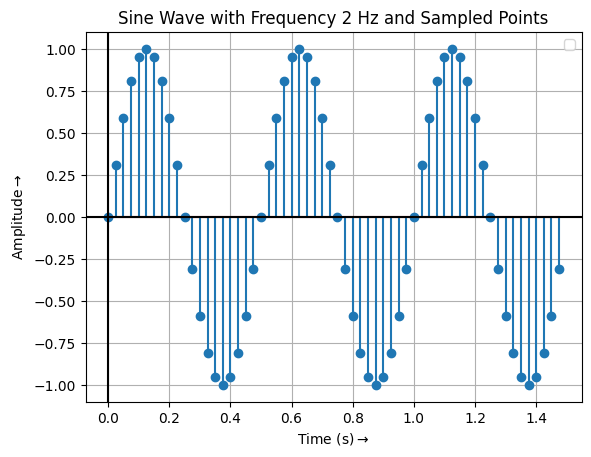

In [30]:
# Frequency of the sine wave
frequency = 2
sampling_rate = 40
fs = sampling_rate
# Generating time data using arange function from numpy
#time = np.arange(0,5, 10)
#sampling_interval=0.5

time=np.linspace(0,duration,int(sampling_rate*duration),endpoint=False)

# Calculate the amplitude of the sine wave
sine_wave = np.sin(2 * np.pi * frequency * time)
# Time range and step size
#time = np.arange(0,5, 0.0001)


# Finding amplitude at each time
#exponential_signal=amplitude*np.exp(-decay_factor*time)
#sampling_points=np.arange(0,5+sampling_interval, sampling_interval)
#amplitude_decay = constant * np.exp(-time)
# Plot the original sine wave
#plt.plot(time, amplitude, label='Original Sine Wave')
#plt.plot(time, exponential_signal)

# Sampled points
#sample_indices = np.arange(0, 4, 0.2)  # Sample every 0.5 seconds
#sample_values = np.sin(2 * np.pi * frequency * sample_indices)

# Plot the sampled points
#plt.stem(sample_indices, sample_values, 'r', markerfmt='ro', basefmt='b', linefmt='r--', label='Sampled Points')
#plt.stem(sampling_points, amplitude*np.exp(-decay_factor*sampling_points),'r',markerfmt='ro',linefmt='r--')
plt.stem(time,sine_wave)


plt.xlabel('Time (s)' + r'$\rightarrow$')
plt.ylabel('Amplitude' + r'$\rightarrow$')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.title(f'Sine Wave with Frequency {frequency} Hz and Sampled Points')
plt.legend()
plt.grid()
plt.show()

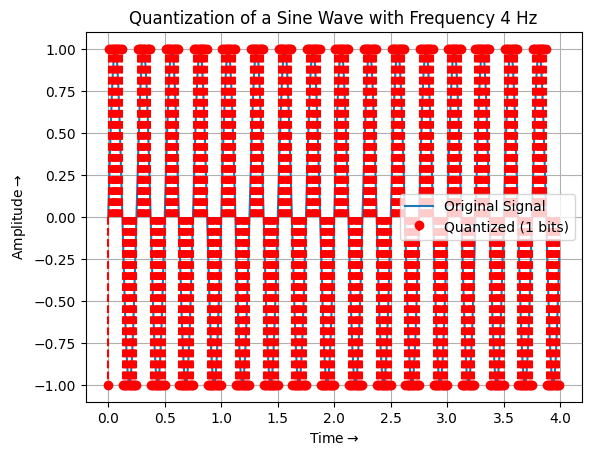

In [19]:
# Original signal parameters
frequency = 4
time = np.arange(0, 4, 0.01)
amplitude = np.sin(2 * np.pi * frequency * time)

# Quantization parameters
num_bits = 1  # Number of bits for quantization
quantization_levels = 2 ** num_bits

# Perform quantization
quantized_values = np.round((amplitude + 1) * (quantization_levels - 1) / 2) * (2 / (quantization_levels - 1)) - 1

# Plot the original signal and quantized values
plt.plot(time, amplitude, label='Original Signal')
plt.stem(time, quantized_values, 'r', markerfmt='ro', linefmt='r--', basefmt=' ', label=f'Quantized ({num_bits} bits)')

plt.xlabel('Time' + r'$\rightarrow$')
plt.ylabel('Amplitude' + r'$\rightarrow$')
plt.title(f'Quantization of a Sine Wave with Frequency {frequency} Hz')
plt.legend()
plt.grid()
plt.show()
